In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import torch
from google.colab.patches import cv2_imshow

In [ ]:
# Build a YOLOv9s model from pretrained weight
model = YOLO("/content/yolov9s.pt")

# Display model information (optional)
model.info()

100%|██████████| 14.7M/14.7M [00:00<00:00, 199MB/s]


YOLOv9s summary: 917 layers, 7318368 parameters, 0 gradients, 27.6 GFLOPs


(917, 7318368, 0, 27.5552768)

In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········


In [ ]:
project = rf.workspace("labelling-hlhit").project("label-box-bnouu")
version = project.version(4)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Label-box-4 in yolov9:: 100%|██████████| 2528/2528 [00:00<00:00, 4414.40it/s]


In [ ]:
results = model.train(data="/content/Label-box-4/data.yaml", epochs=5, imgsz=640, batch=16)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov9s.pt, data=/content/Label-box-4/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 116MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 303MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Label-box-4/Label-box-4/train/labels... 881 images, 0 backgrounds, 0 corrupt: 100%|██████████| 881/881 [00:00<00:00, 2051.40it/s]

train: New cache created: /content/Label-box-4/Label-box-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Label-box-4/Label-box-4/valid/labels... 252 images, 0 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<00:00, 1365.35it/s]


val: New cache created: /content/Label-box-4/Label-box-4/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       5.4G      1.117      2.259      1.459          1        640: 100%|██████████| 56/56 [00:40<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        252        457      0.891      0.765      0.804      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.45G     0.9256      1.014      1.246          5        640: 100%|██████████| 56/56 [00:30<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]

                   all        252        457      0.931      0.811      0.928      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       5.3G     0.8636     0.7961      1.187          3        640: 100%|██████████| 56/56 [00:27<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        252        457      0.926      0.809      0.921      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.29G     0.8145     0.6863      1.143          5        640: 100%|██████████| 56/56 [00:26<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        252        457      0.967      0.828      0.915      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.31G     0.7465     0.5981      1.113          4        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        252        457      0.847      0.992      0.988      0.818



5 epochs completed in 0.054 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 15.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7169797 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]


                   all        252        457      0.847      0.992      0.988      0.818
                 box_1         69         69      0.568      0.971      0.967      0.809
                 box_2         68         68      0.972          1      0.989      0.789
                 box_4         20         20      0.912          1      0.995      0.858
                 box_5         89         90      0.977      0.989      0.989      0.839
                 box_6          2          2       0.71          1      0.995      0.697
                 box_7        126        148      0.917      0.986      0.989      0.891
                 box_8         60         60      0.874          1      0.995      0.846
Speed: 0.7ms preprocess, 7.4ms inference, 0.0ms loss, 9.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.export(format='onnx')

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv9s summary (fused): 486 layers, 7169797 parameters, 0 gradients, 26.7 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (14.5 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 191.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.2s, installed 1 package: ['openvino>=2024.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.2.0-15519-5c0f38f83f6-releases/2024/2...
OpenVINO: export success ✅ 19.7s, saved as 'runs/detect/train/weights/best_openvino_model/' (28.1 MB)

Export complete (23.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_ope

'runs/detect/train/weights/best_openvino_model'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
new_model = YOLO("/content/runs/detect/train/weights/best200.onnx")

In [ ]:
res = model.predict("/content/Label-box-4/Label-box-4/test/images/frame_0021_jpg.rf.1b851d81aa9c9474095b307ef43fc35c.jpg")


image 1/1 /content/Label-box-4/Label-box-4/test/images/frame_0021_jpg.rf.1b851d81aa9c9474095b307ef43fc35c.jpg: 640x640 1 box_1, 1 box_2, 1 box_5, 156.9ms
Speed: 9.7ms preprocess, 156.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


array([[[ 10,   6,  11],
        [ 11,   7,  12],
        [ 11,   7,  12],
        ...,
        [ 38,  36,  35],
        [ 37,  35,  34],
        [ 36,  34,  33]],

       [[ 14,  10,  15],
        [ 14,  10,  15],
        [ 15,  11,  16],
        ...,
        [ 37,  35,  34],
        [ 36,  34,  33],
        [ 35,  33,  32]],

       [[ 15,  11,  16],
        [ 15,  11,  16],
        [ 16,  12,  17],
        ...,
        [ 37,  35,  34],
        [ 35,  33,  32],
        [ 34,  32,  31]],

       ...,

       [[ 32,  27,  29],
        [ 64,  67,  23],
        [183, 223,   0],
        ...,
        [ 13,   1,   7],
        [ 13,   1,   7],
        [ 13,   1,   7]],

       [[ 30,  25,  27],
        [ 62,  66,  21],
        [183, 223,   0],
        ...,
        [ 13,   1,   7],
        [ 13,   1,   7],
        [ 13,   1,   7]],

       [[ 26,  21,  23],
        [ 81,  90,  16],
        [183, 223,   0],
        ...,
        [ 13,   1,   7],
        [ 13,   1,   7],
        [ 13,   1,   7]]], dtype=uint8)
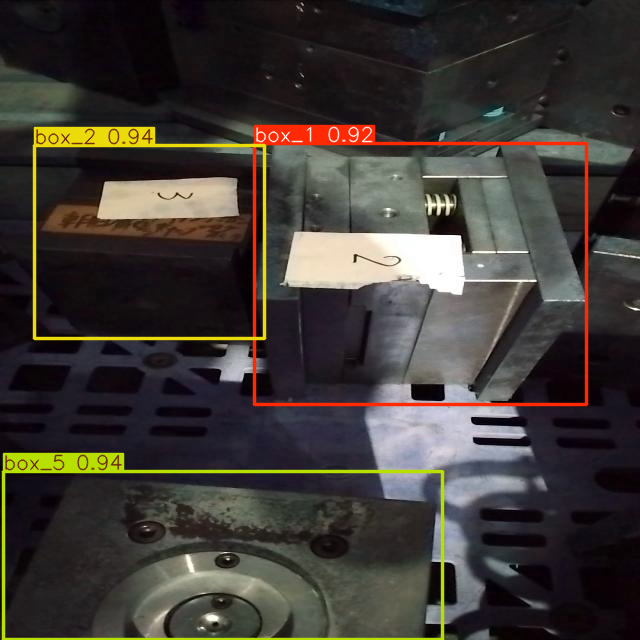

In [ ]:
res[0].plot()